In [13]:
import os
import pandas as pd
import numpy as np  # Corrected: import NumPy directly
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Path to the main folder containing sector folders
main_folder_path = 'sector_wise_daily_data'

# Function to read stock data from a folder (assumes CSV files per stock)
def read_stock_data(sector_folder):
    stock_data = {}
    for file in os.listdir(sector_folder):
        if file.endswith('.csv'):
            file_path = os.path.join(sector_folder, file)
            stock_name = os.path.splitext(file)[0]
            stock_data[stock_name] = pd.read_csv(file_path, index_col='date', parse_dates=True)
    return stock_data

# Function to compute correlation matrix for adjusted close prices of all stocks
def compute_correlation_matrix(stock_data):
    adjusted_close_data = pd.DataFrame()
    for stock_name, data in stock_data.items():
        adjusted_close_data[stock_name] = data['close']  # Assuming 'close' is in the OHLCV data
    correlation_matrix = adjusted_close_data.corr()
    return correlation_matrix

In [ ]:
# Function to find the strongest and weakest correlations in the matrix
def find_strongest_and_weakest(correlation_matrix):
    # Mask diagonal to ignore self-correlation (1.0)
    corr_masked = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))
    
    # Find strongest (max) correlation and its pair
    strongest_pair = corr_masked.stack().idxmax()
    strongest_value = corr_masked.stack().max()

    # Find weakest (min) correlation and its pair
    weakest_pair = corr_masked.stack().idxmin()
    weakest_value = corr_masked.stack().min()

    return (strongest_pair, strongest_value), (weakest_pair, weakest_value)

# Loop over each sector and compute correlation matrix
for sector_folder in os.listdir(main_folder_path):
    sector_path = os.path.join(main_folder_path, sector_folder)
    if os.path.isdir(sector_path):
        print(f"\nSector: {sector_folder}")
        
        # Read stock data for the sector
        sector_data = read_stock_data(sector_path)
        
        if sector_data:
            # Compute the correlation matrix
            correlation_matrix = compute_correlation_matrix(sector_data)
            
            # Display the correlation matrix
            plt.figure(figsize=(10, 8))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
            plt.title(f'Correlation Matrix - {sector_folder}')
            plt.show()
            
            # Find the strongest and weakest correlations
            (strongest_pair, strongest_value), (weakest_pair, weakest_value) = find_strongest_and_weakest(correlation_matrix)
            
            print(f"Strongest Correlation in {sector_folder}: {strongest_pair} with value {strongest_value}")
            print(f"Weakest Correlation in {sector_folder}: {weakest_pair} with value {weakest_value}")
        else:
            print(f"No stock data found in sector: {sector_folder}")


Sector: NIFTY IT


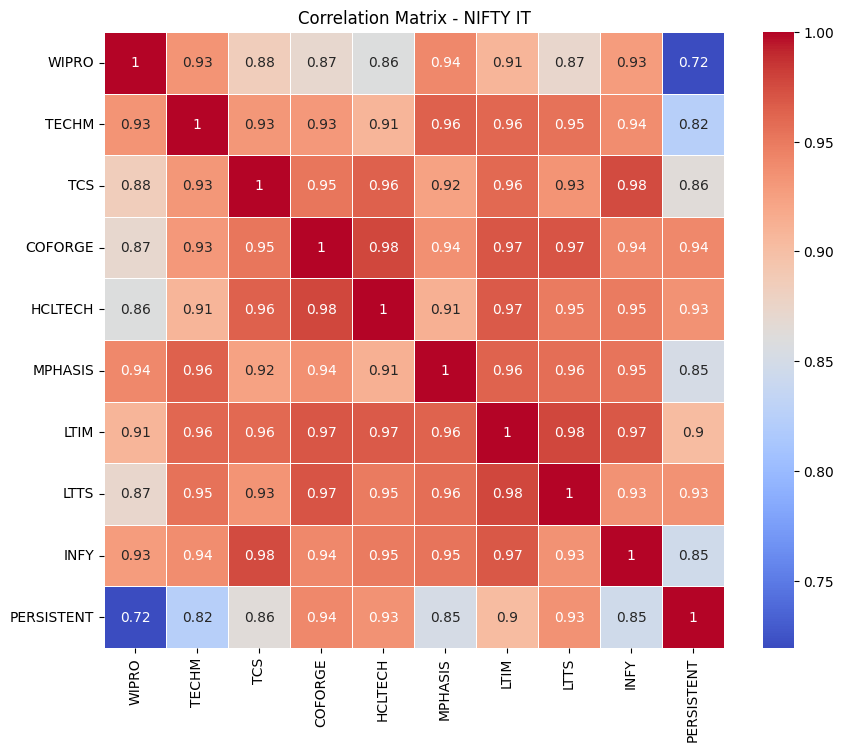

Best Correlated Stock in NIFTY IT: LTIM with average correlation 0.9580010845977197
Worst Correlated Stock in NIFTY IT: PERSISTENT with average correlation 0.8818755250398252

Sector: NIFTY INFRASTRUCTURE


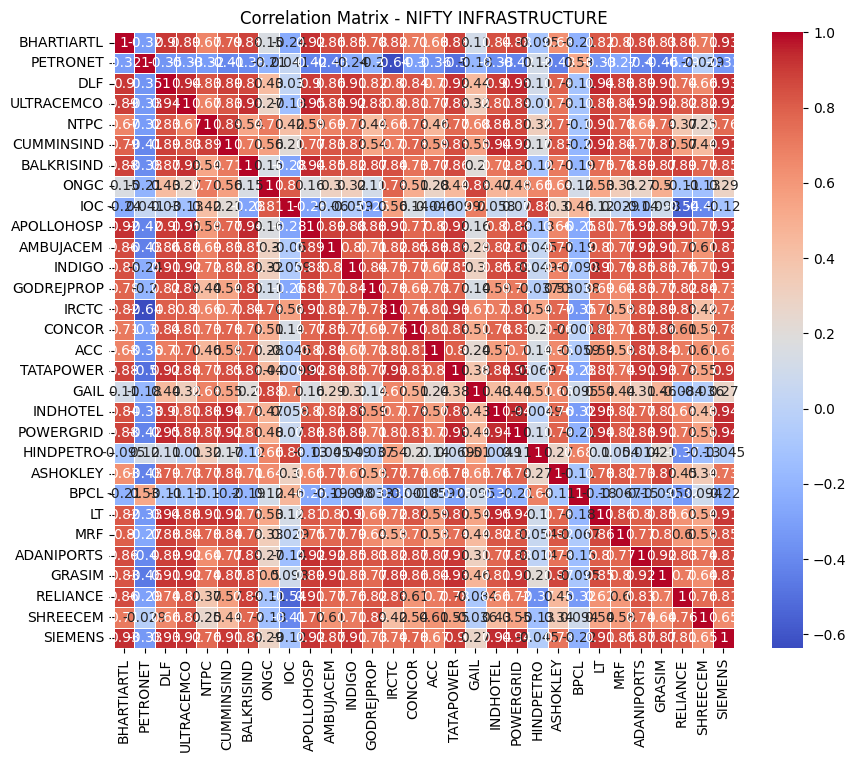

Best Correlated Stock in NIFTY INFRASTRUCTURE: DLF with average correlation 0.7110282844367617
Worst Correlated Stock in NIFTY INFRASTRUCTURE: PETRONET with average correlation -0.24168702505666376

Sector: NIFTY REALTY


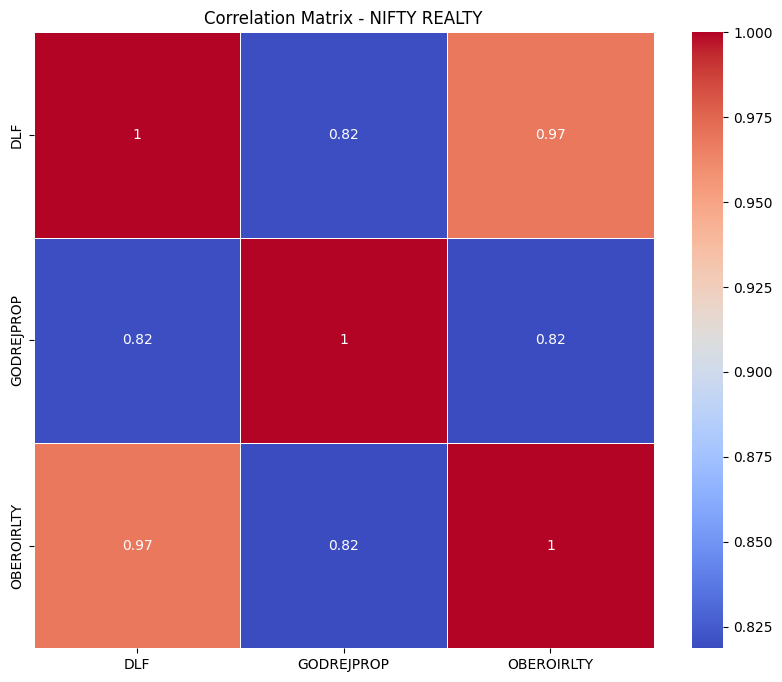

Best Correlated Stock in NIFTY REALTY: DLF with average correlation 0.9293293183914341
Worst Correlated Stock in NIFTY REALTY: GODREJPROP with average correlation 0.8794601271099842

Sector: NIFTY HEALTHCARE INDEX


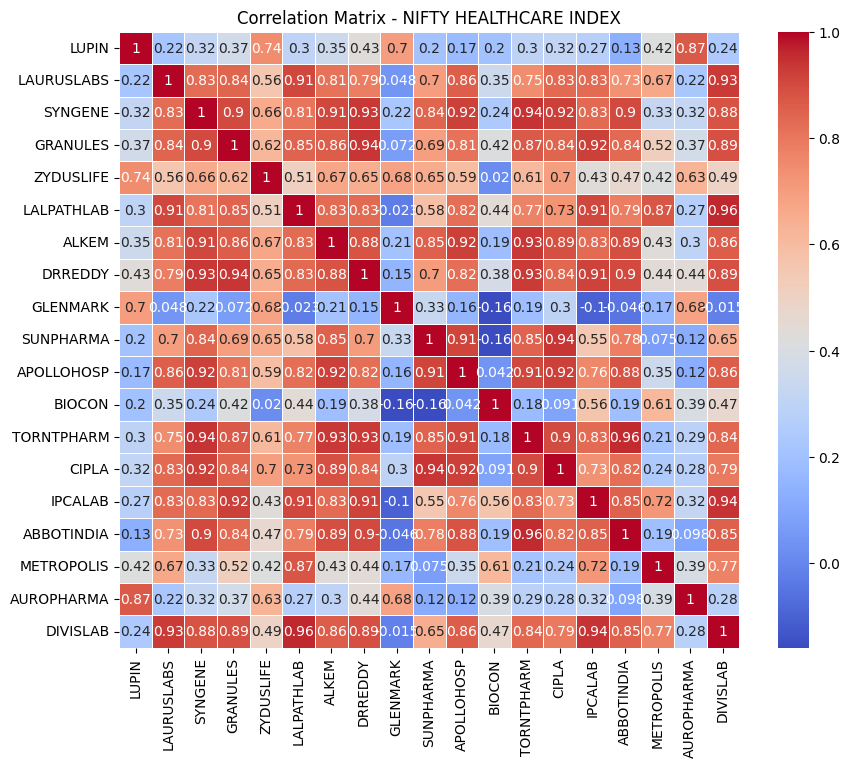

Best Correlated Stock in NIFTY HEALTHCARE INDEX: DRREDDY with average correlation 0.7303449673379642
Worst Correlated Stock in NIFTY HEALTHCARE INDEX: GLENMARK with average correlation 0.2395404467216414

Sector: NIFTY FINANCIAL SERVICES


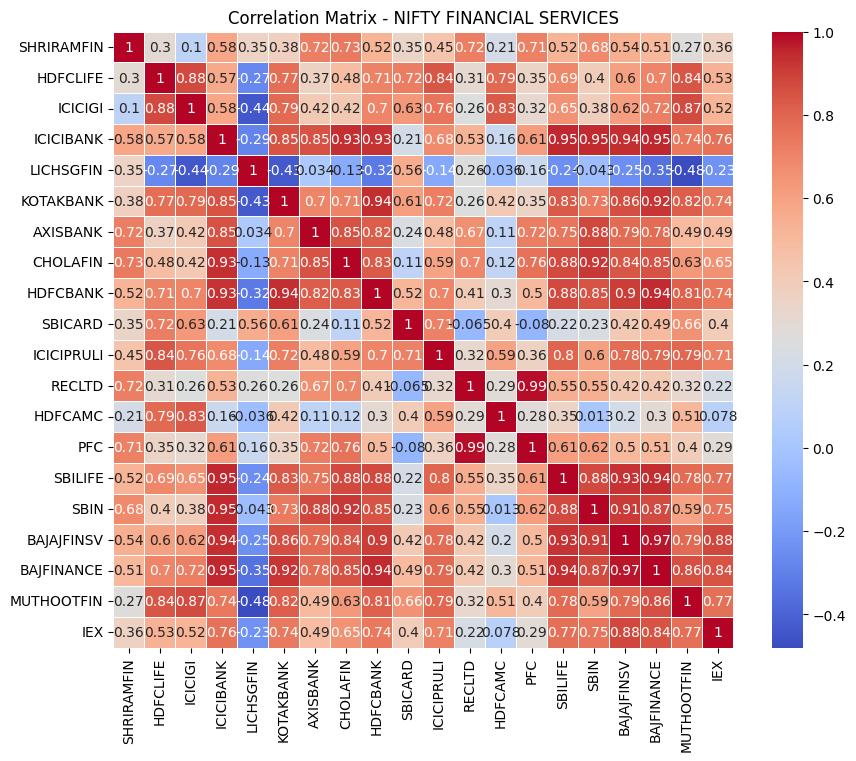

Best Correlated Stock in NIFTY FINANCIAL SERVICES: BAJFINANCE with average correlation 0.701395608332186
Worst Correlated Stock in NIFTY FINANCIAL SERVICES: LICHSGFIN with average correlation -0.06391573168050266

Sector: NIFTY CPSE


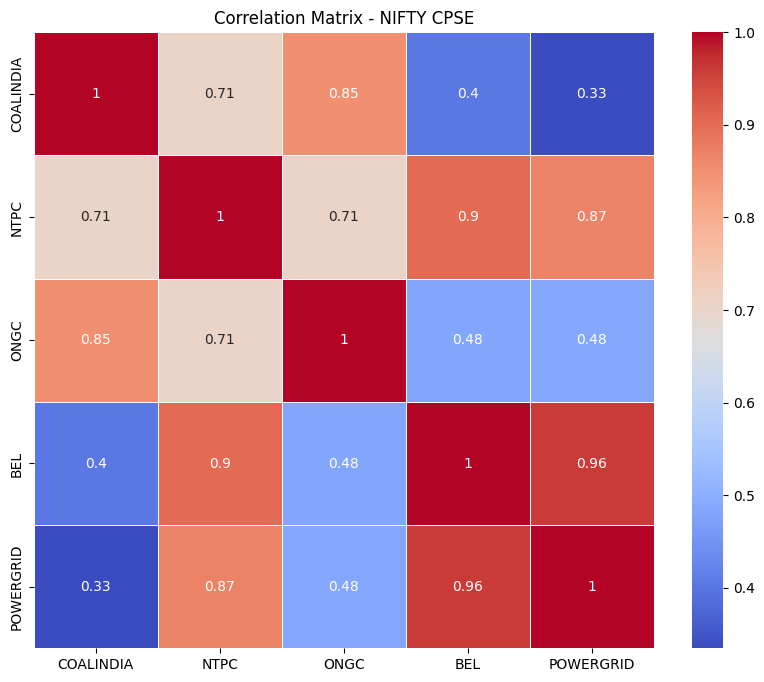

Best Correlated Stock in NIFTY CPSE: NTPC with average correlation 0.8360443659788468
Worst Correlated Stock in NIFTY CPSE: COALINDIA with average correlation 0.6590054292770722

Sector: NIFTY PRIVATE BANK


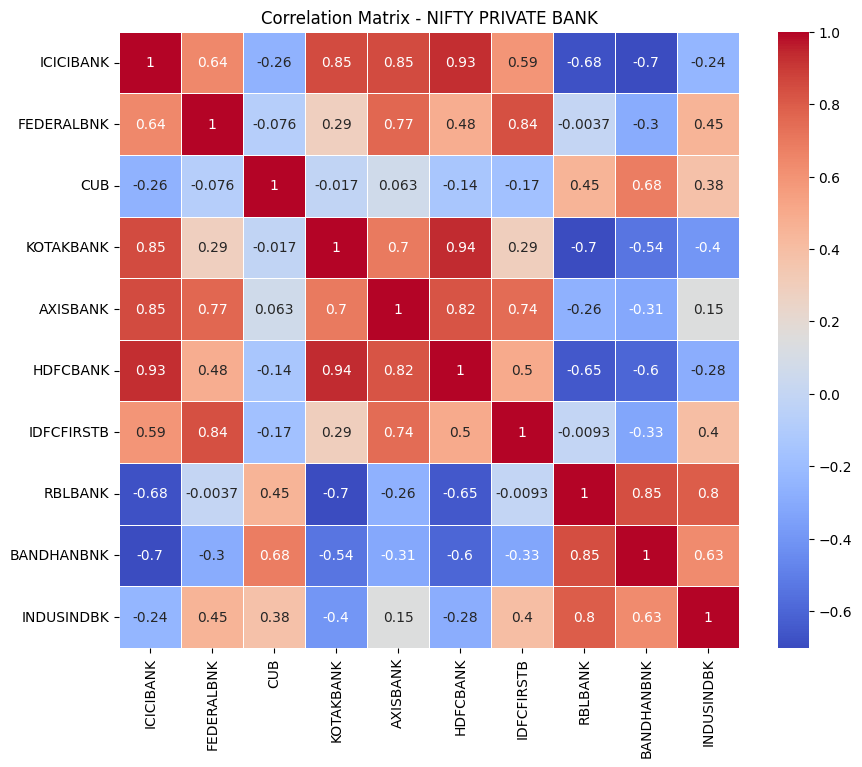

Best Correlated Stock in NIFTY PRIVATE BANK: AXISBANK with average correlation 0.4518794913651643
Worst Correlated Stock in NIFTY PRIVATE BANK: BANDHANBNK with average correlation 0.0381053063718866

Sector: NIFTY CONSUMER DURABLES


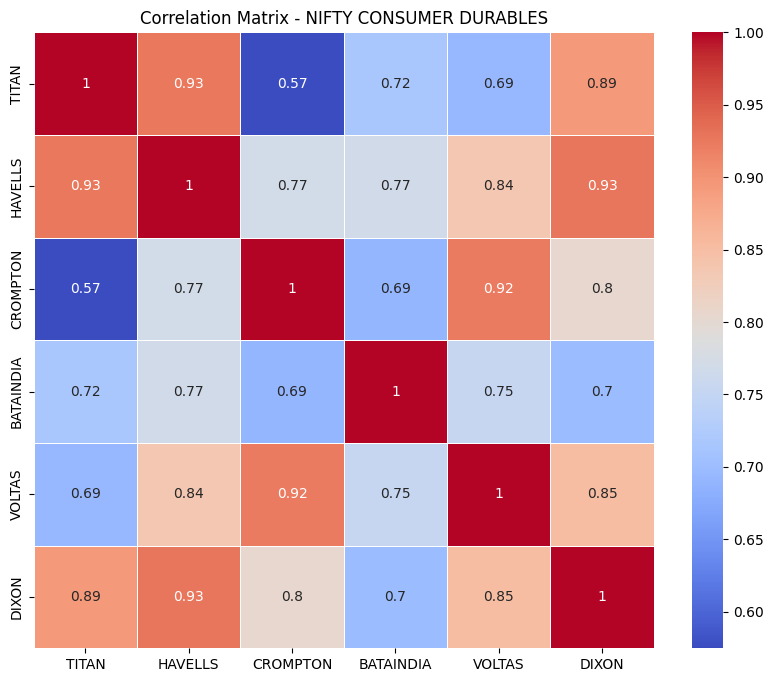

Best Correlated Stock in NIFTY CONSUMER DURABLES: HAVELLS with average correlation 0.8716021833266825
Worst Correlated Stock in NIFTY CONSUMER DURABLES: BATAINDIA with average correlation 0.7713933394351095

Sector: NIFTY ENERGY


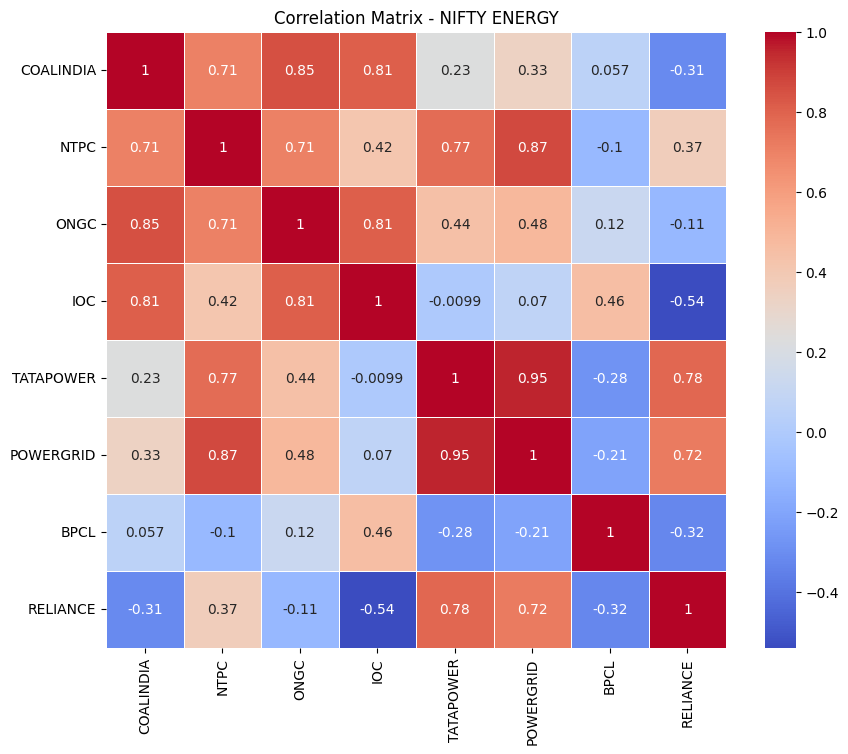

Best Correlated Stock in NIFTY ENERGY: NTPC with average correlation 0.5907036616221815
Worst Correlated Stock in NIFTY ENERGY: BPCL with average correlation 0.08926954941229583

Sector: NIFTY MEDIA


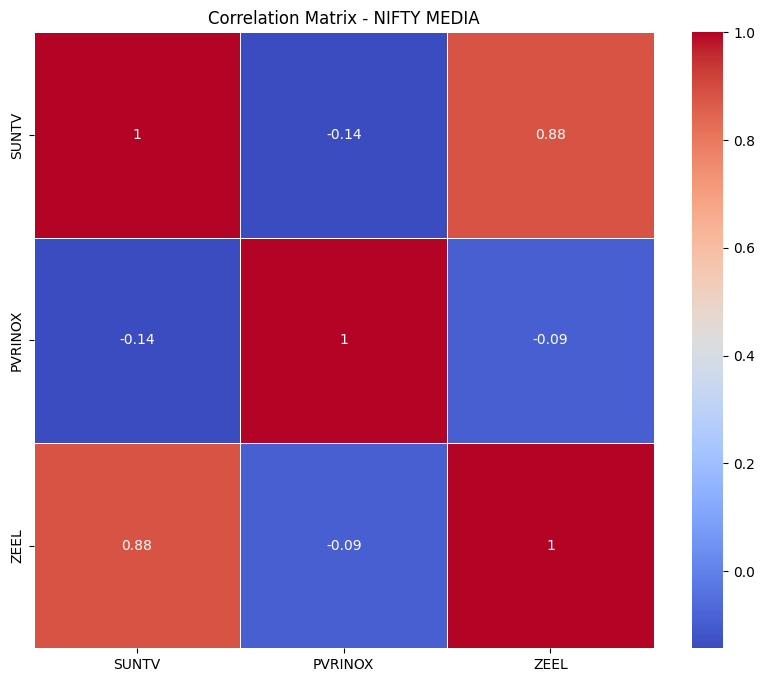

Best Correlated Stock in NIFTY MEDIA: ZEEL with average correlation 0.5977624918305714
Worst Correlated Stock in NIFTY MEDIA: PVRINOX with average correlation 0.25546091427985296

Sector: NIFTY PSU BANK


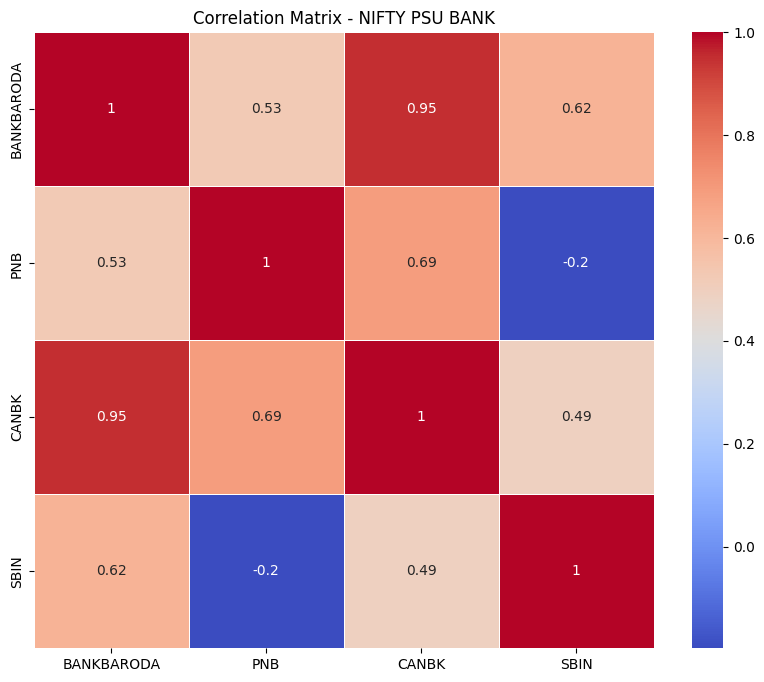

Best Correlated Stock in NIFTY PSU BANK: CANBK with average correlation 0.7829453052288561
Worst Correlated Stock in NIFTY PSU BANK: SBIN with average correlation 0.4779042021119099

Sector: NIFTY PSE


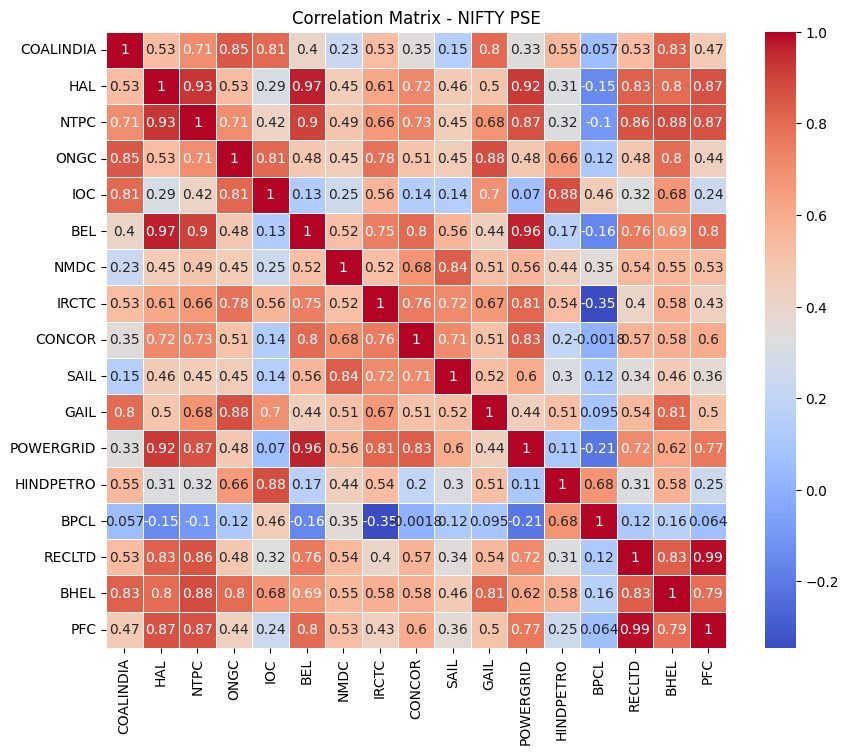

Best Correlated Stock in NIFTY PSE: BHEL with average correlation 0.6849485214221556
Worst Correlated Stock in NIFTY PSE: BPCL with average correlation 0.13330551632578946

Sector: NIFTY COMMODITIES


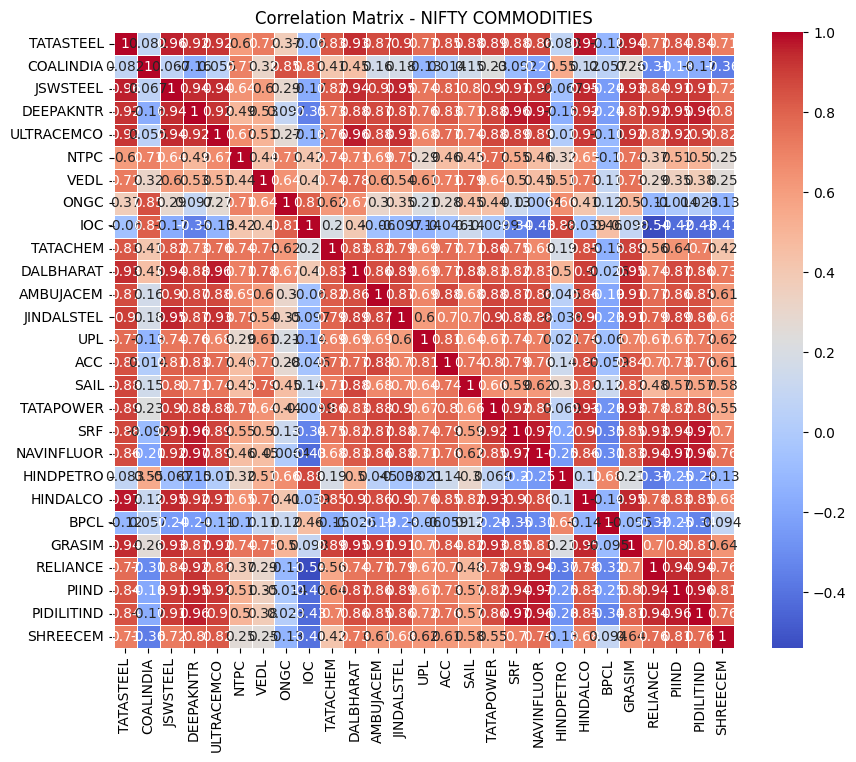

Best Correlated Stock in NIFTY COMMODITIES: DALBHARAT with average correlation 0.7649677718409662
Worst Correlated Stock in NIFTY COMMODITIES: BPCL with average correlation -0.035538684986712324

Sector: NIFTY METAL


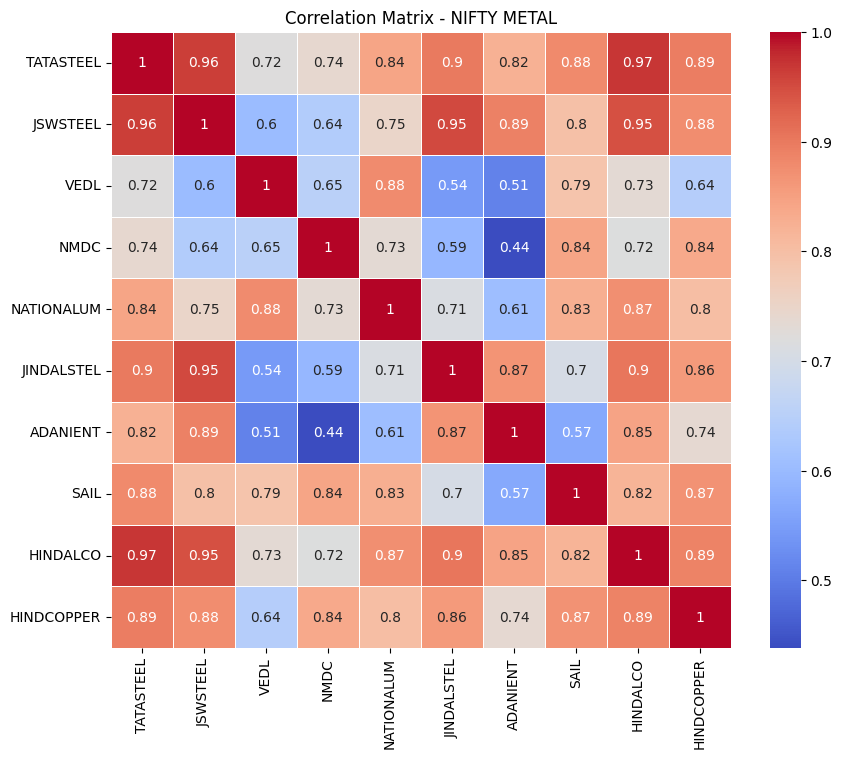

Best Correlated Stock in NIFTY METAL: TATASTEEL with average correlation 0.8740365687263753
Worst Correlated Stock in NIFTY METAL: VEDL with average correlation 0.7072508052481471

Sector: NIFTY FMCG


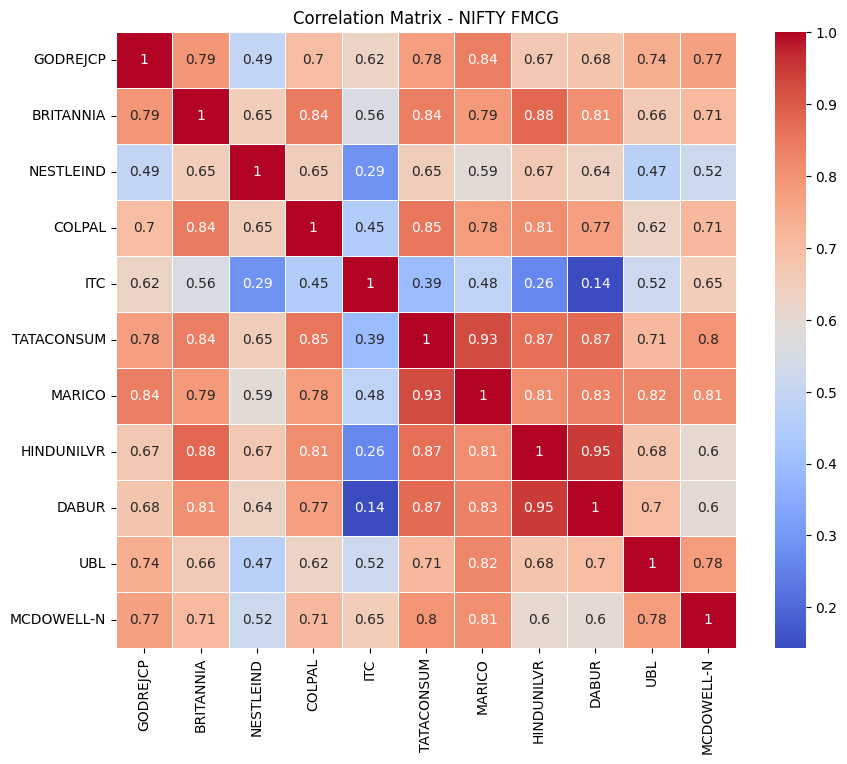

Best Correlated Stock in NIFTY FMCG: MARICO with average correlation 0.7895522770121336
Worst Correlated Stock in NIFTY FMCG: ITC with average correlation 0.4882846218247916

Sector: NIFTY OIL & GAS


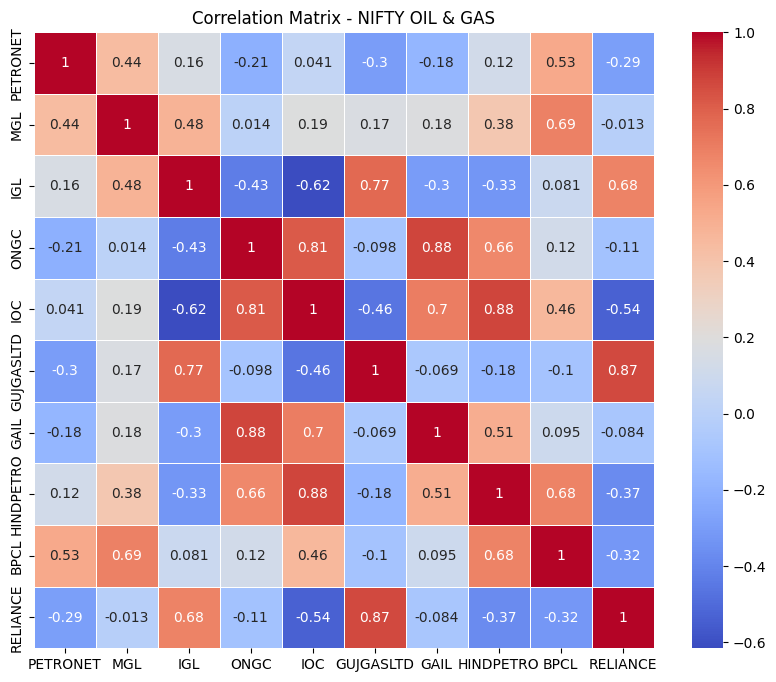

Best Correlated Stock in NIFTY OIL & GAS: MGL with average correlation 0.3530958990972493
Worst Correlated Stock in NIFTY OIL & GAS: RELIANCE with average correlation 0.08150138699143997

Sector: NIFTY AUTO


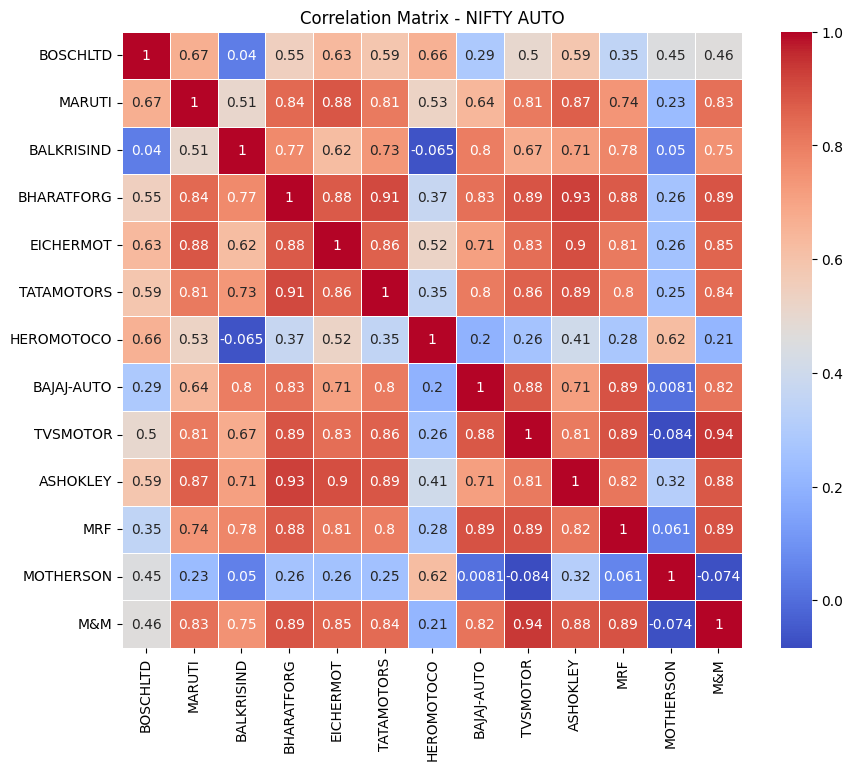

Best Correlated Stock in NIFTY AUTO: BHARATFORG with average correlation 0.7678106765826532
Worst Correlated Stock in NIFTY AUTO: MOTHERSON with average correlation 0.2580351232478455

Sector: NIFTY BANK


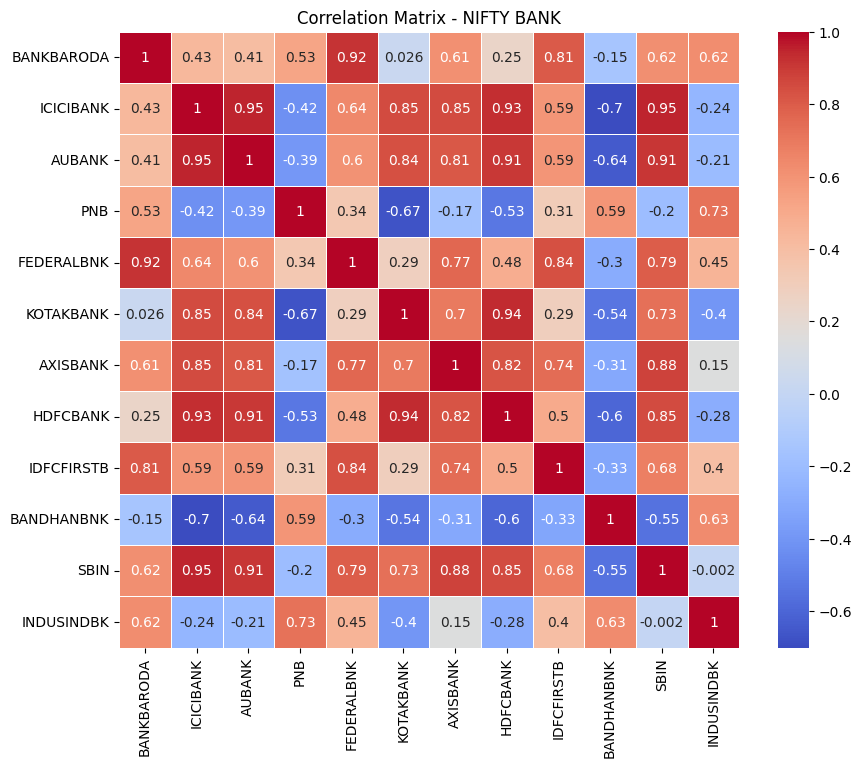

Best Correlated Stock in NIFTY BANK: AXISBANK with average correlation 0.5704596904410982
Worst Correlated Stock in NIFTY BANK: BANDHANBNK with average correlation -0.15830095184146023

Sector: NIFTY PHARMA


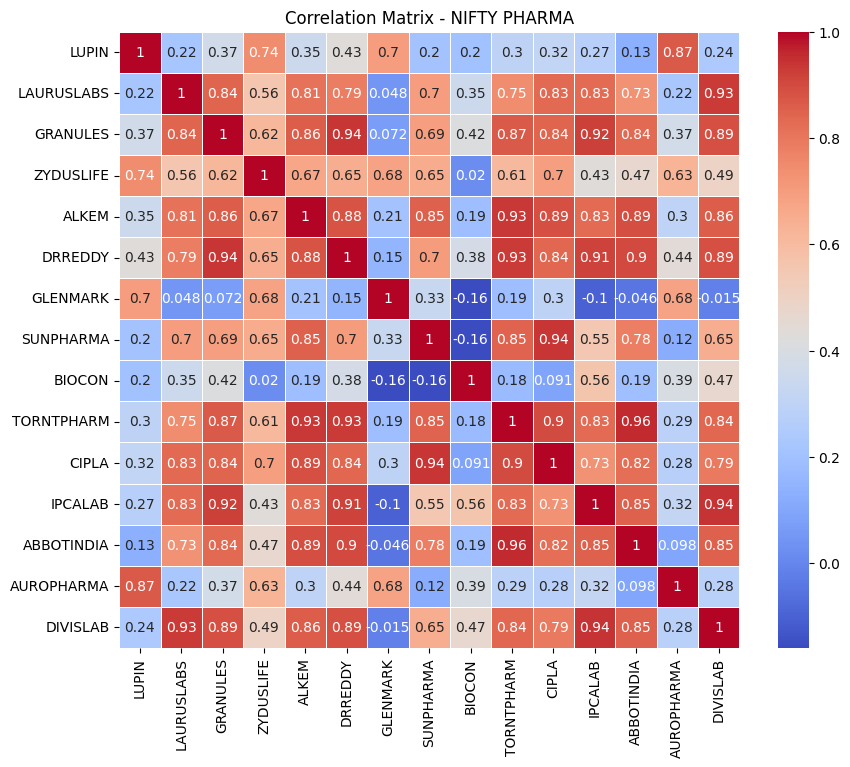

Best Correlated Stock in NIFTY PHARMA: DRREDDY with average correlation 0.7228960962895622
Worst Correlated Stock in NIFTY PHARMA: GLENMARK with average correlation 0.2686951658370481
Results saved to sector_correlation_results.txt


In [17]:
# Path to the main folder containing sector folders
main_folder_path = 'sector_wise_daily_data'

# Path to save the results text file
results_file_path = 'sector_correlation_results.txt'

# Function to read stock data from a folder (assumes CSV files per stock)
def read_stock_data(sector_folder):
    stock_data = {}
    for file in os.listdir(sector_folder):
        if file.endswith('.csv'):
            file_path = os.path.join(sector_folder, file)
            stock_name = os.path.splitext(file)[0]
            stock_data[stock_name] = pd.read_csv(file_path, index_col='date', parse_dates=True)
    return stock_data

# Function to compute correlation matrix for adjusted close prices of all stocks
def compute_correlation_matrix(stock_data):
    adjusted_close_data = pd.DataFrame()
    for stock_name, data in stock_data.items():
        adjusted_close_data[stock_name] = data['close']  # Assuming 'close' is in the OHLCV data
    correlation_matrix = adjusted_close_data.corr()
    return correlation_matrix

# Function to find the stock with the highest and lowest average correlation
def find_best_and_worst_overall(correlation_matrix):
    # Compute average correlation for each stock with all other stocks (ignore self-correlation)
    avg_correlation = correlation_matrix.mean(axis=1)

    # Find stock with highest and lowest average correlation
    best_stock = avg_correlation.idxmax()
    best_value = avg_correlation.max()

    worst_stock = avg_correlation.idxmin()
    worst_value = avg_correlation.min()

    return (best_stock, best_value), (worst_stock, worst_value)

# Initialize an empty list to store the results
results = []

# Loop over each sector and compute correlation matrix
for sector_folder in os.listdir(main_folder_path):
    sector_path = os.path.join(main_folder_path, sector_folder)
    if os.path.isdir(sector_path):
        print(f"\nSector: {sector_folder}")
        
        # Read stock data for the sector
        sector_data = read_stock_data(sector_path)
        
        if sector_data:
            # Compute the correlation matrix
            correlation_matrix = compute_correlation_matrix(sector_data)
            
            # Display the correlation matrix
            plt.figure(figsize=(10, 8))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
            plt.title(f'Correlation Matrix - {sector_folder}')
            plt.show()
            
            # Find the stock with highest and lowest average correlation
            (best_stock, best_value), (worst_stock, worst_value) = find_best_and_worst_overall(correlation_matrix)
            
            # Print the results
            print(f"Best Correlated Stock in {sector_folder}: {best_stock} with average correlation {best_value}")
            print(f"Worst Correlated Stock in {sector_folder}: {worst_stock} with average correlation {worst_value}")
            
            # Append the results to the list
            results.append(f"Sector: {sector_folder}")
            results.append(f"Best Correlated Stock: {best_stock} with average correlation {best_value}")
            results.append(f"Worst Correlated Stock: {worst_stock} with average correlation {worst_value}")
            results.append("\n")
        else:
            print(f"No stock data found in sector: {sector_folder}")

# Write the results to a text file
with open(results_file_path, 'w') as f:
    for line in results:
        f.write(line + '\n')

print(f"Results saved to {results_file_path}")


Processing Sector: NIFTY IT

Processing Sector: NIFTY INFRASTRUCTURE

Processing Sector: NIFTY REALTY

Processing Sector: NIFTY HEALTHCARE INDEX

Processing Sector: NIFTY FINANCIAL SERVICES

Processing Sector: NIFTY CPSE

Processing Sector: NIFTY PRIVATE BANK

Processing Sector: NIFTY CONSUMER DURABLES

Processing Sector: NIFTY ENERGY

Processing Sector: NIFTY MEDIA

Processing Sector: NIFTY PSU BANK

Processing Sector: NIFTY PSE

Processing Sector: NIFTY COMMODITIES

Processing Sector: NIFTY METAL

Processing Sector: NIFTY FMCG

Processing Sector: NIFTY OIL & GAS

Processing Sector: NIFTY AUTO

Processing Sector: NIFTY BANK

Processing Sector: NIFTY PHARMA


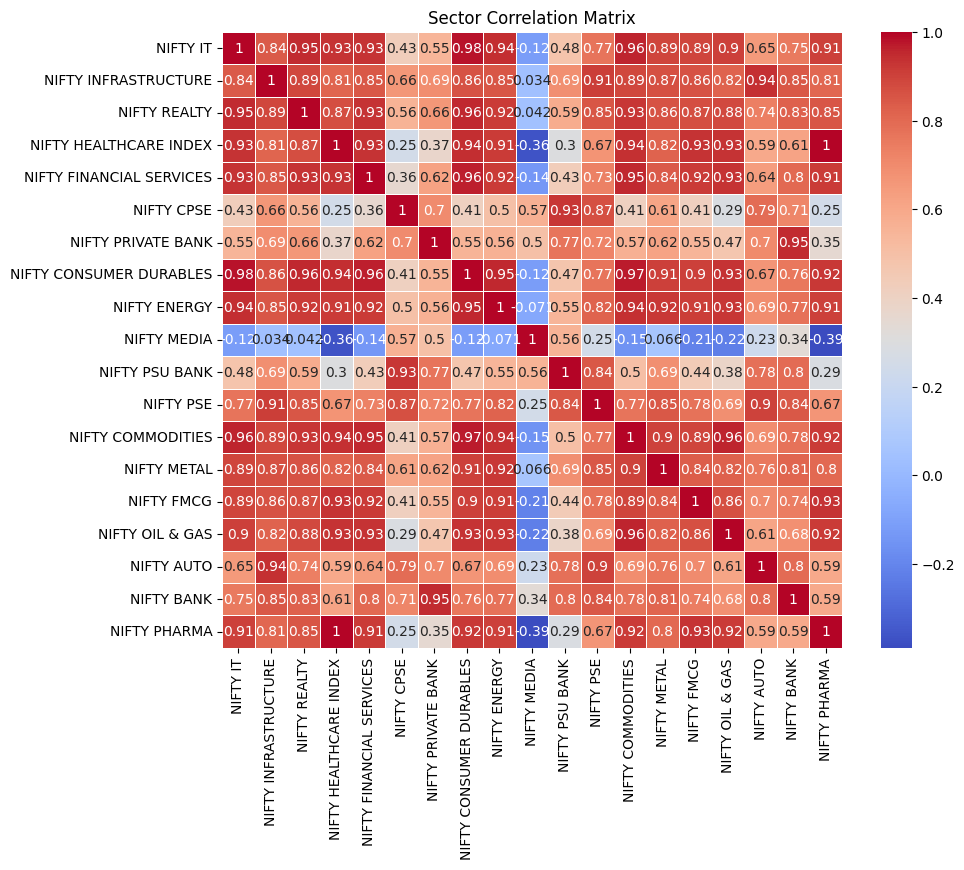

Best Correlated Sectors: ('NIFTY HEALTHCARE INDEX', 'NIFTY PHARMA') with correlation 0.9961022219158806
Worst Correlated Sectors: ('NIFTY MEDIA', 'NIFTY PHARMA') with correlation -0.38892009962900465


In [18]:
# Path to the main folder containing sector folders
main_folder_path = 'sector_wise_daily_data'

# Function to read stock data from a folder (assumes CSV files per stock)
def read_stock_data(sector_folder):
    stock_data = {}
    for file in os.listdir(sector_folder):
        if file.endswith('.csv'):
            file_path = os.path.join(sector_folder, file)
            stock_name = os.path.splitext(file)[0]
            stock_data[stock_name] = pd.read_csv(file_path, index_col='date', parse_dates=True)
    return stock_data

# Function to compute the mean adjusted close prices for a sector
def compute_mean_adjusted_close(stock_data):
    adjusted_close_data = pd.DataFrame()
    for stock_name, data in stock_data.items():
        adjusted_close_data[stock_name] = data['close']  # Assuming 'close' is in the OHLCV data
    
    # Compute the mean adjusted close prices across all stocks in the sector
    mean_adjusted_close = adjusted_close_data.mean(axis=1)
    return mean_adjusted_close

# Dictionary to store the mean adjusted close prices for each sector
sector_mean_prices = {}

# Loop over each sector and compute mean adjusted close prices
for sector_folder in os.listdir(main_folder_path):
    sector_path = os.path.join(main_folder_path, sector_folder)
    if os.path.isdir(sector_path):
        print(f"\nProcessing Sector: {sector_folder}")
        
        # Read stock data for the sector
        sector_data = read_stock_data(sector_path)
        
        if sector_data:
            # Compute the mean adjusted close prices for the sector
            sector_mean_prices[sector_folder] = compute_mean_adjusted_close(sector_data)
        else:
            print(f"No stock data found in sector: {sector_folder}")

# Convert the dictionary of sector mean prices into a DataFrame
sector_mean_df = pd.DataFrame(sector_mean_prices)

# Compute the correlation matrix of sectors
sector_correlation_matrix = sector_mean_df.corr()

# Display the sector correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(sector_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Sector Correlation Matrix')
plt.show()

# Find the best and worst correlated sector pairs
def find_best_and_worst_sectors(correlation_matrix):
    # Mask diagonal to ignore self-correlation (1.0)
    corr_masked = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))
    
    # Find strongest (max) correlation and its sector pair
    best_sectors = corr_masked.stack().idxmax()
    best_value = corr_masked.stack().max()

    # Find weakest (min) correlation and its sector pair
    worst_sectors = corr_masked.stack().idxmin()
    worst_value = corr_masked.stack().min()

    return (best_sectors, best_value), (worst_sectors, worst_value)

# Find the strongest and weakest correlated sectors
(best_sectors, best_value), (worst_sectors, worst_value) = find_best_and_worst_sectors(sector_correlation_matrix)

# Print the best and worst correlated sectors
print(f"Best Correlated Sectors: {best_sectors} with correlation {best_value}")
print(f"Worst Correlated Sectors: {worst_sectors} with correlation {worst_value}")

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to the main folder containing sector folders
main_folder_path = 'sector_wise_daily_data'

# Path to save the results text file
correlation_results_file = 'sector_nifty_correlations.txt'

# Function to read stock data from a folder (assumes CSV files per stock)
def read_stock_data(sector_folder):
    stock_data = {}
    for file in os.listdir(sector_folder):
        if file.endswith('.csv'):
            file_path = os.path.join(sector_folder, file)
            stock_name = os.path.splitext(file)[0]
            stock_data[stock_name] = pd.read_csv(file_path, index_col='date', parse_dates=True)
    return stock_data

# Function to compute the mean adjusted close prices for a sector
def compute_mean_adjusted_close(stock_data):
    adjusted_close_data = pd.DataFrame()
    for stock_name, data in stock_data.items():
        adjusted_close_data[stock_name] = data['close']  # Assuming 'close' is in the OHLCV data
    
    # Compute the mean adjusted close prices across all stocks in the sector
    mean_adjusted_close = adjusted_close_data.mean(axis=1)
    return mean_adjusted_close

# Dictionary to store the mean adjusted close prices for each sector
sector_mean_prices = {}

# Loop over each sector and compute mean adjusted close prices
for sector_folder in os.listdir(main_folder_path):
    sector_path = os.path.join(main_folder_path, sector_folder)
    if os.path.isdir(sector_path):
        print(f"\nProcessing Sector: {sector_folder}")
        
        # Read stock data for the sector
        sector_data = read_stock_data(sector_path)
        
        if sector_data:
            # Compute the mean adjusted close prices for the sector
            sector_mean_prices[sector_folder] = compute_mean_adjusted_close(sector_data)
        else:
            print(f"No stock data found in sector: {sector_folder}")

# Extract the mean prices for NIFTY 50, NIFTY NEXT 50, and NIFTY 100
nifty_50_prices = sector_mean_prices.get('NIFTY 50')
nifty_next_50_prices = sector_mean_prices.get('NIFTY NEXT 50')
nifty_100_prices = sector_mean_prices.get('NIFTY 100')

# Ensure NIFTY data is available
if not (nifty_50_prices is not None and nifty_next_50_prices is not None and nifty_100_prices is not None):
    raise ValueError("NIFTY 50, NIFTY NEXT 50, or NIFTY 100 data not found in the sectors folder.")

# Initialize an empty list to store the correlation results
correlation_results = []

# Loop through all sectors and calculate correlation with NIFTY 50, NIFTY NEXT 50, and NIFTY 100
for sector_name, sector_prices in sector_mean_prices.items():
    if sector_name not in ['NIFTY 50', 'NIFTY NEXT 50', 'NIFTY 100']:  # Exclude NIFTY indices themselves
        # Calculate correlation with NIFTY 50, NIFTY NEXT 50, and NIFTY 100
        corr_with_nifty_50 = sector_prices.corr(nifty_50_prices)
        corr_with_nifty_next_50 = sector_prices.corr(nifty_next_50_prices)
        corr_with_nifty_100 = sector_prices.corr(nifty_100_prices)
        
        # Print and save the results
        correlation_results.append(f"Sector: {sector_name}")
        correlation_results.append(f"Correlation with NIFTY 50: {corr_with_nifty_50:.4f}")
        correlation_results.append(f"Correlation with NIFTY NEXT 50: {corr_with_nifty_next_50:.4f}")
        correlation_results.append(f"Correlation with NIFTY 100: {corr_with_nifty_100:.4f}")
        correlation_results.append("\n")  # Add a newline for separation

# Write the correlation results to a text file
with open(correlation_results_file, 'w') as f:
    for line in correlation_results:
        f.write(line + '\n')

print(f"Correlation results saved to {correlation_results_file}")


Processing Sector: NIFTY IT

Processing Sector: NIFTY INFRASTRUCTURE

Processing Sector: NIFTY REALTY

Processing Sector: NIFTY HEALTHCARE INDEX

Processing Sector: NIFTY FINANCIAL SERVICES

Processing Sector: NIFTY CPSE

Processing Sector: NIFTY PRIVATE BANK

Processing Sector: NIFTY CONSUMER DURABLES

Processing Sector: NIFTY 100

Processing Sector: NIFTY 50

Processing Sector: NIFTY ENERGY

Processing Sector: NIFTY MEDIA

Processing Sector: NIFTY PSU BANK

Processing Sector: NIFTY PSE

Processing Sector: NIFTY COMMODITIES

Processing Sector: NIFTY METAL

Processing Sector: NIFTY NEXT 50

Processing Sector: NIFTY FMCG

Processing Sector: NIFTY OIL & GAS

Processing Sector: NIFTY AUTO

Processing Sector: NIFTY BANK

Processing Sector: NIFTY PHARMA
Correlation results saved to sector_nifty_correlations.txt


In [32]:
import os
import pandas as pd
from datetime import datetime, timedelta

# Helper functions
def calculate_percentage_change(start_price, end_price):
    return ((end_price - start_price) / start_price) * 100

def get_time_period_performance(data, start_date, end_date):
    try:
        # Access 'close' using the index
        start_price = data.loc[start_date, 'close']
        end_price = data.loc[end_date, 'close']
        return calculate_percentage_change(start_price, end_price)
    except KeyError as e:
        print(f"Date not found in data: {e}")
        return None

def find_best_worst_period(data, min_time=timedelta(days=30), max_time=timedelta(days=730)):
    best_period = None
    worst_period = None
    best_performance = float('-inf')
    worst_performance = float('inf')

    dates = data.index

    for i in range(len(dates)):
        start_date = dates[i]
        # Define the end date range based on min and max time
        min_end_date = start_date + min_time
        max_end_date = start_date + max_time

        # Find all possible end dates within the range
        possible_end_dates = dates[(dates >= min_end_date) & (dates <= max_end_date)]

        for end_date in possible_end_dates:
            performance = get_time_period_performance(data, start_date, end_date)
            if performance is None:
                continue
            if performance > best_performance:
                best_performance = performance
                best_period = (start_date, end_date)
            if performance < worst_performance:
                worst_performance = performance
                worst_period = (start_date, end_date)

    return best_period, best_performance, worst_period, worst_performance

def get_top_performing_stocks(stock_data, start_date, end_date, top_n=3, ascending=False):
    stock_performance = []
    for stock_name, df in stock_data.items():
        try:
            start_price = df.loc[df['date'] == start_date, 'close'].values[0]
            end_price = df.loc[df['date'] == end_date, 'close'].values[0]
            performance = calculate_percentage_change(start_price, end_price)
            stock_performance.append((stock_name, performance, start_price, end_price))
        except IndexError:
            print(f"Missing data for {stock_name} between {start_date} and {end_date}. Skipping.")
            continue

    # Sort based on performance
    stock_performance.sort(key=lambda x: x[1], reverse=not ascending)
    return stock_performance[:top_n]

# Main function
def analyze_sector_performance(sector_folder):
    sector_name = os.path.basename(sector_folder)
    stock_data = {}

    # Load each stock CSV in the sector folder
    for stock_file in os.listdir(sector_folder):
        stock_path = os.path.join(sector_folder, stock_file)
        if not stock_file.lower().endswith('.csv'):
            continue  # Skip non-CSV files
        stock_name = os.path.splitext(stock_file)[0]
        try:
            df = pd.read_csv(stock_path, parse_dates=['date'])
            # Ensure 'date' and 'close' columns exist
            if 'date' not in df.columns or 'close' not in df.columns:
                print(f"Missing 'date' or 'close' in {stock_file}. Skipping.")
                continue
            df = df[['date', 'close']].dropna()
            stock_data[stock_name] = df
        except Exception as e:
            print(f"Error reading {stock_file}: {e}. Skipping.")
            continue

    if not stock_data:
        print(f"No valid stock data found in sector: {sector_name}")
        return None

    # Combine all stocks in a sector for sector-level analysis
    sector_combined_data = pd.concat([df.set_index('date')['close'] for df in stock_data.values()], axis=1)
    sector_combined_data = sector_combined_data.mean(axis=1).reset_index()
    sector_combined_data.columns = ['date', 'close']
    sector_combined_data['date'] = pd.to_datetime(sector_combined_data['date'])
    sector_combined_data.set_index('date', inplace=True)

    # Find best and worst periods for the sector
    best_period, best_performance, worst_period, worst_performance = find_best_worst_period(sector_combined_data)

    if best_period is None or worst_period is None:
        print(f"Could not find valid best or worst periods for sector: {sector_name}")
        return None

    # Get top 3 best and worst performing stocks for the best and worst periods
    best_start, best_end = best_period
    worst_start, worst_end = worst_period

    top_3_best_stocks = get_top_performing_stocks(stock_data, best_start, best_end, top_n=3, ascending=False)
    top_3_worst_stocks = get_top_performing_stocks(stock_data, worst_start, worst_end, top_n=3, ascending=True)

    # Calculate the duration in years/months for display
    def format_duration(start, end):
        delta = end - start
        years = delta.days // 365
        months = (delta.days % 365) // 30
        if years > 0:
            return f"{years} years {months} months"
        else:
            return f"{months} months"

    return {
        'sector': sector_name,
        'best_performance': best_performance,
        'best_period': best_period,
        'best_duration': format_duration(best_period[0], best_period[1]),
        'top_3_best_stocks': top_3_best_stocks,
        'worst_performance': worst_performance,
        'worst_period': worst_period,
        'worst_duration': format_duration(worst_period[0], worst_period[1]),
        'top_3_worst_stocks': top_3_worst_stocks
    }

# Save results to text file
def save_results_to_file(results, output_file):
    with open(output_file, 'w') as f:
        for result in results:
            if result is None:
                continue
            f.write(f"Sector: {result['sector']}\n")
            f.write(f"Best Performance: {result['best_performance']:.2f}% over {result['best_duration']} from {result['best_period'][0].date()} to {result['best_period'][1].date()}\n")
            f.write(f"Top 3 Best Performing Stocks:\n")
            for stock in result['top_3_best_stocks']:
                f.write(f"{stock[0]}: {stock[1]:.2f}% from {stock[2]:.2f} to {stock[3]:.2f}\n")
            f.write(f"Worst Performance: {result['worst_performance']:.2f}% over {result['worst_duration']} from {result['worst_period'][0].date()} to {result['worst_period'][1].date()}\n")
            f.write(f"Top 3 Worst Performing Stocks:\n")
            for stock in result['top_3_worst_stocks']:
                f.write(f"{stock[0]}: {stock[1]:.2f}% from {stock[2]:.2f} to {stock[3]:.2f}\n")
            f.write("\n")

# Main script execution
if __name__ == "__main__":
    sector_folder_path = "sector_wise_daily_data"  # **Update this path**
    output_file_path = "stock_sector_performance.txt"
    results = []

    # Verify the sector folder path
    if not os.path.exists(sector_folder_path):
        print(f"The specified sector folder path does not exist: {sector_folder_path}")
    else:
        for sector_folder in os.listdir(sector_folder_path):
            sector_folder_full_path = os.path.join(sector_folder_path, sector_folder)
            if os.path.isdir(sector_folder_full_path):
                print(f"Analyzing sector: {sector_folder}")
                sector_result = analyze_sector_performance(sector_folder_full_path)
                if sector_result:
                    results.append(sector_result)

        if results:
            save_results_to_file(results, output_file_path)
            print(f"Results saved to {output_file_path}")
        else:
            print("No results to save.")

Analyzing sector: NIFTY IT
Analyzing sector: NIFTY INFRASTRUCTURE
Missing data for IRCTC between 2018-04-27 00:00:00 and 2020-03-23 00:00:00. Skipping.
Analyzing sector: NIFTY REALTY
Analyzing sector: NIFTY HEALTHCARE INDEX
Analyzing sector: NIFTY FINANCIAL SERVICES
Missing data for SBICARD between 2020-02-20 00:00:00 and 2020-03-23 00:00:00. Skipping.
Analyzing sector: NIFTY CPSE
Analyzing sector: NIFTY PRIVATE BANK
Analyzing sector: NIFTY CONSUMER DURABLES
Analyzing sector: NIFTY 100
Missing data for SBICARD between 2020-02-13 00:00:00 and 2020-03-23 00:00:00. Skipping.
Analyzing sector: NIFTY 50
Analyzing sector: NIFTY ENERGY
Analyzing sector: NIFTY MEDIA
Analyzing sector: NIFTY PSU BANK
Analyzing sector: NIFTY PSE
Missing data for IRCTC between 2018-04-10 00:00:00 and 2020-03-25 00:00:00. Skipping.
Analyzing sector: NIFTY COMMODITIES
Analyzing sector: NIFTY METAL
Analyzing sector: NIFTY NEXT 50
Missing data for SBICARD between 2020-02-07 00:00:00 and 2020-03-24 00:00:00. Skipping.


In [4]:
import os
import pandas as pd

# Function to determine which sentiment to use based on time
def get_relevant_sentiment(row):
    time = pd.to_datetime(row['date']).time()
    if time > pd.Timestamp("15:30:00").time():
        return row['next_day_sentiment']
    else:
        return row['market_sentiment']

# Function to analyze performance for a sector
def analyze_sector_performance(sector_folder, sentiment_folder):
    sector_results = {}
    news_count, positive_news, negative_news, neutral_news = 0, 0, 0, 0
    same_sentiment_reactions, contrary_sentiment_reactions = 0, 0
    stocks_reacting_similar = {}

    for stock_file in os.listdir(sector_folder):
        stock_file_path = os.path.join(sector_folder, stock_file)
        
        if stock_file.endswith('.csv'):
            # Load stock OHLCV data
            stock_ohlcv_df = pd.read_csv(stock_file_path)

            # Match with the corresponding sentiment file
            sentiment_file_path = os.path.join(sentiment_folder, stock_file.replace('.csv', '_merged.csv'))
            if os.path.exists(sentiment_file_path):
                sentiment_df = pd.read_csv(sentiment_file_path)

                # Count the total number of news articles
                news_count += len(sentiment_df)

                # Categorize news sentiments
                positive_news += len(sentiment_df[sentiment_df['title_sentiment'] == 'positive'])
                negative_news += len(sentiment_df[sentiment_df['title_sentiment'] == 'negative'])
                neutral_news += len(sentiment_df[sentiment_df['title_sentiment'] == 'neutral'])

                # Determine relevant market sentiment (next day or same day)
                sentiment_df['relevant_sentiment'] = sentiment_df.apply(get_relevant_sentiment, axis=1)

                # Compare the market reaction to news sentiment
                matching_reactions = sentiment_df[
                    ((sentiment_df['title_sentiment'] == 'positive') & (sentiment_df['relevant_sentiment'] == 'positive')) |
                    ((sentiment_df['title_sentiment'] == 'negative') & (sentiment_df['relevant_sentiment'] == 'negative')) |
                    ((sentiment_df['title_sentiment'] == 'neutral') & (sentiment_df['relevant_sentiment'] == 'neutral'))
                ]

                contrary_reactions = sentiment_df[
                    ((sentiment_df['title_sentiment'] == 'positive') & (sentiment_df['relevant_sentiment'] == 'negative')) |
                    ((sentiment_df['title_sentiment'] == 'negative') & (sentiment_df['relevant_sentiment'] == 'positive')) |
                    ((sentiment_df['title_sentiment'] == 'neutral') & (sentiment_df['relevant_sentiment'] != 'neutral'))
                ]

                same_sentiment_reactions += len(matching_reactions)
                contrary_sentiment_reactions += len(contrary_reactions)

                # Track stock performance in reactions
                stocks_reacting_similar[stock_file] = len(matching_reactions) / len(sentiment_df) if len(sentiment_df) > 0 else 0

    # Calculate the percentages for news sentiment categories
    sector_results['news_count'] = news_count
    sector_results['positive_news'] = (positive_news / news_count) * 100 if news_count else 0
    sector_results['negative_news'] = (negative_news / news_count) * 100 if news_count else 0
    sector_results['neutral_news'] = (neutral_news / news_count) * 100 if news_count else 0

    # Calculate percentage of matching and contrary sentiment reactions
    sector_results['matching_reactions'] = (same_sentiment_reactions / news_count) * 100 if news_count else 0
    sector_results['contrary_reactions'] = (contrary_sentiment_reactions / news_count) * 100 if news_count else 0

    # Return top 3 stocks with most similar reactions
    sorted_stocks = sorted(stocks_reacting_similar.items(), key=lambda x: x[1], reverse=True)[:3]
    sector_results['top_stocks'] = sorted_stocks

    return sector_results

# Main function to perform analysis across all sectors
def perform_sector_analysis(sector_folders, sentiment_folder, output_file_path):
    results = []

    for sector_folder in os.listdir(sector_folders):
        sector_folder_full_path = os.path.join(sector_folders, sector_folder)
        if os.path.isdir(sector_folder_full_path):
            sector_result = analyze_sector_performance(sector_folder_full_path, sentiment_folder)
            sector_result['sector'] = sector_folder
            results.append(sector_result)

    # Save the results to a text file
    with open(output_file_path, 'w') as output_file:
        output_file.write("Sector Analysis Results\n")
        output_file.write("-----------------------\n")
        for result in results:
            output_file.write(f"Sector: {result['sector']}\n")
            output_file.write(f"Total News: {result['news_count']}\n")
            output_file.write(f"Positive News: {result['positive_news']}%\n")
            output_file.write(f"Negative News: {result['negative_news']}%\n")
            output_file.write(f"Neutral News: {result['neutral_news']}%\n")
            output_file.write(f"Matching Sentiment Reactions: {result['matching_reactions']}%\n")
            output_file.write(f"Contrary Sentiment Reactions: {result['contrary_reactions']}%\n")
            output_file.write(f"Top 3 Stocks Reacting Similar to News Sentiment:\n")
            for stock, reaction_ratio in result['top_stocks']:
                output_file.write(f"    {stock}: {reaction_ratio * 100:.2f}%\n")
            output_file.write("\n")

    print("Analysis complete. Results saved to:", output_file_path)

# Example usage
sector_folders = "sector_wise_daily_data"  # Folder containing sector-wise stock CSVs
sentiment_folder = "market_sentiments"  # Folder containing sentiment CSVs
output_file_path = "sector_sentiment_analysis_results.txt"  # Output results file

perform_sector_analysis(sector_folders, sentiment_folder, output_file_path)

Analysis complete. Results saved to: sector_sentiment_analysis_results.txt
